In [371]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [372]:
lang_data = lang_data = pd.read_csv("languages.tsv", sep="\t")
bert_langs = lang_data[lang_data["bert training data"]]["language"]

In [283]:
relevant_cols = [
    'Language',
    'SGD Accuracy',
    'SGD Balanced Accuracy',
    'Majority Baseline Accuracy', 
    'Random Baseline Accuracy SGD',
    'SGD Sensitivity',]

In [244]:
def group_script(row):
    if row["Script"].strip() in ["Latin", "Cyrillic"]:
        return row["Script"]
    else:
        return "Other"

In [245]:
def group_family(row):
    if "IE" in row["Family"]:
        return True
    else:
        return False

In [246]:
def group_bert(row, langs):
    if row["Language"].strip() in langs.values:
        return True
    else:
        return False

In [247]:
def apply_groups(data, langs):
    data["Indo-European"] = data.apply(group_family, axis=1)
    data["Script"] = data.apply(group_script, axis=1)
    data["In mBERT Training Data"] = data.apply(group_bert, axis=1, langs=langs)

In [267]:
def add_boxplots(axes, ax_idx, data):
    g1 = sns.boxplot(ax=axes[ax_idx, 0],
            data=data,
            x="Indo-European",
            y="SGD Accuracy")
    g1.set(ylabel=None, xlabel=None)
    g2 = sns.boxplot(ax=axes[ax_idx, 1],
            data=data,
            x="Script",
            y="SGD Accuracy",
            order=["Latin", "Cyrillic", "Other"],)
    g2.set(ylabel=None, xlabel=None)
    g3 = sns.boxplot(ax=axes[ax_idx, 2],
            data=data,
            x="In mBERT Training Data",
            y="SGD Accuracy")
    g3.set(ylabel=None, xlabel=None)
    

In [526]:
def add_barplot(axes, ax_idx, data, title):
   labels = {'SGD Accuracy': "Acc",
          'SGD Balanced Accuracy': "B-Acc", 
          'Majority Baseline Accuracy': "Maj",
       'Random Baseline Accuracy SGD': "Rand", 
       'SGD Sensitivity': "Selec"}
   g = sns.barplot(ax=axes[ax_idx], x=[labels[i] for i in data.index], y=data)
   axes[ax_idx].tick_params(axis='x', rotation=90)
   axes[ax_idx].set_title(title)
    

In [268]:
y_labels = ["POS", "Gender", "Number", "Case", "Tense"]
x_titles = ["Indo-European", "Script", "mBERT"]

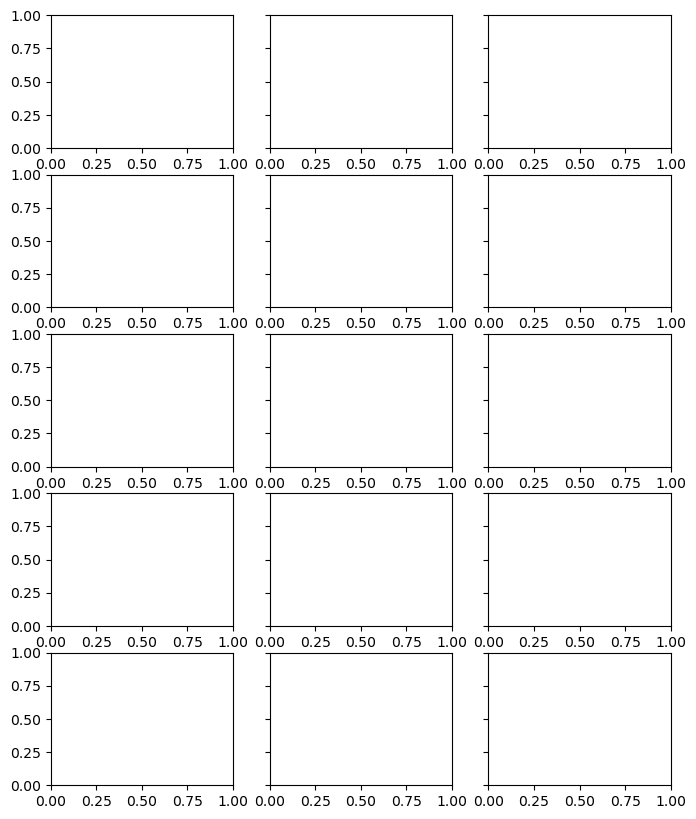

In [269]:
fig, axes = plt.subplots(5, 3, figsize=(8, 10), sharey=True)
    

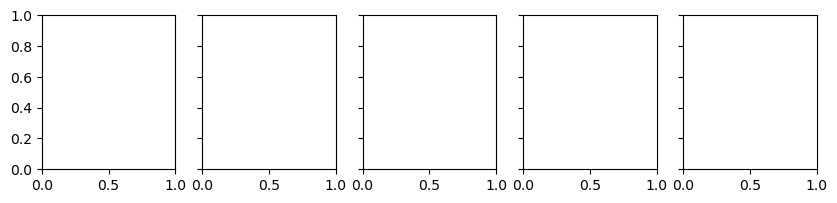

In [534]:
fig_bar, axes_bar = plt.subplots(1, 5, figsize=(10, 2), sharey=True)

## POS Experiments

In [270]:
pos_data = pd.read_csv("results/upos.tsv", sep="\t", index_col=0)
apply_groups(pos_data, langs=bert_langs)
add_boxplots(axes, ax_idx=0, data=pos_data)


In [535]:
pos_mean = pos_data[relevant_cols].mean()
add_barplot(axes=axes_bar, ax_idx=0, data=pos_mean, title="POS")

/tmp/ipykernel_231599/224723906.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  pos_mean = pos_data[relevant_cols].mean()


In [361]:
print("Languages where Majority Baseline outperforms probe:")
mask = pos_data["Majority Baseline Accuracy"] > pos_data["SGD Accuracy"]
print(" ".join(pos_data[mask]["Language"]))
print("-----"*30)

print("Languages where Random Baseline outperforms probe:")
mask = pos_data["Random Baseline Accuracy SGD"] >pos_data["SGD Accuracy"]
print(" ".join(pos_data[mask]["Language"]))
print("-----"*30)

print("Languages with lowest selectivity:")
sort_selec = pos_data.sort_values(by="SGD Sensitivity").head(5)
print(sort_selec[["Language", "SGD Sensitivity"]])
print("-----"*30)


print("Languages with highest selectivity:")
sort_selec = pos_data.sort_values(by="SGD Sensitivity", ascending=False).head(5)
print(sort_selec[["Language", "SGD Sensitivity"]])
print("-----"*30)

Languages where Majority Baseline outperforms probe:
Hindi Japanese Komi Zyrian Persian (Farsi) Urdu Uyghur
------------------------------------------------------------------------------------------------------------------------------------------------------
Languages where Random Baseline outperforms probe:
Uyghur
------------------------------------------------------------------------------------------------------------------------------------------------------
Languages with lowest selectivity:
    Language  SGD Sensitivity
65     Naija        -0.008502
54  Ligurian         0.008508
61     Wolof         0.050224
51      Urdu         0.055248
53     Welsh         0.060823
------------------------------------------------------------------------------------------------------------------------------------------------------
Languages with highest selectivity:
      Language  SGD Sensitivity
30      Korean         0.414757
43      Slovak         0.362710
29     Kirghiz         0.357999
4 

In [290]:
pos_data.groupby(by="Indo-European")[relevant_cols].mean().round(decimals=3)

/tmp/ipykernel_231599/3384129834.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pos_data.groupby(by="Indo-European")[relevant_cols].mean().round(decimals=3)


,SGD Accuracy,SGD Balanced Accuracy,Majority Baseline Accuracy,Random Baseline Accuracy SGD,SGD Sensitivity
Indo-European,,,,,
False,0.765,0.640,0.696,0.605,0.209
True,0.844,0.742,0.770,0.662,0.192


In [309]:
pos_data.groupby(by="In mBERT Training Data")[relevant_cols].mean().round(decimals=3)

/tmp/ipykernel_231599/239127052.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pos_data.groupby(by="In mBERT Training Data")[relevant_cols].mean().round(decimals=3)


,SGD Accuracy,SGD Balanced Accuracy,Majority Baseline Accuracy,Random Baseline Accuracy SGD,SGD Sensitivity
In mBERT Training Data,,,,,
False,0.684,0.554,0.630,0.574,0.146
True,0.841,0.735,0.765,0.654,0.211


In [310]:
pos_data.groupby(by="Script")[relevant_cols].mean().round(decimals=3)

/tmp/ipykernel_231599/2955872070.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  pos_data.groupby(by="Script")[relevant_cols].mean().round(decimals=3)


,SGD Accuracy,SGD Balanced Accuracy,Majority Baseline Accuracy,Random Baseline Accuracy SGD,SGD Sensitivity
Script,,,,,
Cyrillic,0.691,0.514,0.569,0.492,0.263
Latin,0.841,0.738,0.765,0.664,0.184
Other,0.807,0.717,0.778,0.663,0.197


In [444]:
## How many for each task?
print(pos_data["In mBERT Training Data"].value_counts())
print(pos_data["Script"].value_counts())
print(pos_data["Indo-European"].value_counts())

True     54
False    13
Name: In mBERT Training Data, dtype: int64
Latin       42
Other       15
Cyrillic    10
Name: Script, dtype: int64
True     39
False    28
Name: Indo-European, dtype: int64


## Gender

In [271]:
gender_data = pd.read_csv("results/gender.tsv", sep="\t", index_col=0)
apply_groups(gender_data, langs=bert_langs)
add_boxplots(axes, ax_idx=1, data=gender_data)

In [536]:
gender_mean = gender_data[relevant_cols].mean()
add_barplot(axes=axes_bar, ax_idx=1, data=gender_mean, title="Gender")

/tmp/ipykernel_231599/3099666026.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  gender_mean = gender_data[relevant_cols].mean()


In [359]:
print("Languages where Majority Baseline outperforms probe:")
mask = gender_data["Majority Baseline Accuracy"] > gender_data["SGD Accuracy"]
print(" ".join(gender_data[mask]["Language"]))
print("-----"*30)

print("Languages where Random Baseline outperforms probe:")
mask = gender_data["Random Baseline Accuracy SGD"] >gender_data["SGD Accuracy"]
print(" ".join(gender_data[mask]["Language"]))
print("-----"*30)

print("Languages with lowest selectivity:")
sort_selec = gender_data.sort_values(by="SGD Sensitivity").head(8)
print(sort_selec[["Language", "SGD Sensitivity"]])
print("-----"*30)


print("Languages with highest selectivity:")
sort_selec = gender_data.sort_values(by="SGD Sensitivity", ascending=False).head(5)
print(sort_selec[["Language", "SGD Sensitivity"]])
print("-----"*30)

Languages where Majority Baseline outperforms probe:
Buryat Hindi Irish Maghrebi Arabic French Marathi Urdu Welsh
------------------------------------------------------------------------------------------------------------------------------------------------------
Languages where Random Baseline outperforms probe:
Kazakh Maghrebi Arabic French
------------------------------------------------------------------------------------------------------------------------------------------------------
Languages with lowest selectivity:
               Language  SGD Sensitivity
42                Wolof        -0.456983
14            Icelandic        -0.066058
18                Latin        -0.039256
36                Welsh        -0.030848
44       Turkish German        -0.027073
40             Kurmanji        -0.001962
30            Slovenian        -0.001578
23  Norwegian (Nynorsk)         0.004537
---------------------------------------------------------------------------------------------------

In [343]:
gender_data.groupby(by="Indo-European")[relevant_cols].mean().round(decimals=3)

/tmp/ipykernel_231599/1867497031.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gender_data.groupby(by="Indo-European")[relevant_cols].mean().round(decimals=3)


,SGD Accuracy,SGD Balanced Accuracy,Majority Baseline Accuracy,Random Baseline Accuracy SGD,SGD Sensitivity
Indo-European,,,,,
False,0.831,0.728,0.751,0.682,0.112
True,0.813,0.779,0.736,0.645,0.086


In [333]:
gender_data.groupby(by="Script")[relevant_cols].mean().round(decimals=3)

/tmp/ipykernel_231599/1662989801.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gender_data.groupby(by="Script")[relevant_cols].mean().round(decimals=3)


,SGD Accuracy,SGD Balanced Accuracy,Majority Baseline Accuracy,Random Baseline Accuracy SGD,SGD Sensitivity
Script,,,,,
Cyrillic,0.783,0.721,0.599,0.596,0.131
Latin,0.803,0.761,0.738,0.664,0.064
Other,0.898,0.830,0.868,0.665,0.164


In [334]:
gender_data.groupby(by="In mBERT Training Data")[relevant_cols].mean().round(decimals=3)

/tmp/ipykernel_231599/1471496213.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  gender_data.groupby(by="In mBERT Training Data")[relevant_cols].mean().round(decimals=3)


,SGD Accuracy,SGD Balanced Accuracy,Majority Baseline Accuracy,Random Baseline Accuracy SGD,SGD Sensitivity
In mBERT Training Data,,,,,
False,0.776,0.723,0.762,0.63,0.047
True,0.827,0.777,0.734,0.66,0.103


In [445]:
## How many for each task?
print(gender_data["In mBERT Training Data"].value_counts())
print(gender_data["Script"].value_counts())
print(gender_data["Indo-European"].value_counts())

True     37
False     9
Name: In mBERT Training Data, dtype: int64
Latin       31
Other        8
Cyrillic     7
Name: Script, dtype: int64
True     35
False    11
Name: Indo-European, dtype: int64


## Number

In [336]:
number_data = pd.read_csv("results/number.tsv", sep="\t", index_col=0)
apply_groups(number_data, langs=bert_langs)
add_boxplots(axes, ax_idx=2, data=number_data)

In [540]:
number_mean = number_data[relevant_cols].mean()
add_barplot(axes=axes_bar, ax_idx=2, data=number_mean, title="Number")

/tmp/ipykernel_231599/2742603181.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  number_mean = number_data[relevant_cols].mean()


In [357]:
print("Languages where Majority Baseline outperforms probe:")
mask = number_data ["Majority Baseline Accuracy"] > number_data  ["SGD Accuracy"]
print(" ".join(number_data[mask]["Language"]))
print("-----"*30)

print("Languages where Random Baseline outperforms probe:")
mask = number_data["Random Baseline Accuracy SGD"] >number_data["SGD Accuracy"]
print(" ".join(number_data[mask]["Language"]))
print("-----"*30)

print("Languages with lowest selectivity:")
sort_selec = number_data.sort_values(by="SGD Sensitivity").head(5)
print(sort_selec[["Language", "SGD Sensitivity"]])
print("-----"*30)


print("Languages with highest selectivity:")
sort_selec = number_data.sort_values(by="SGD Sensitivity", ascending=False).head(5)
print(sort_selec[["Language", "SGD Sensitivity"]])
print("-----"*30)

Languages where Majority Baseline outperforms probe:
Hindi Icelandic Irish Komi Zyrian Kurmanji Latin Latvian Ligurian Marathi Serbian Slovak
------------------------------------------------------------------------------------------------------------------------------------------------------
Languages where Random Baseline outperforms probe:
Komi Zyrian Kurmanji Ligurian
------------------------------------------------------------------------------------------------------------------------------------------------------
Languages with lowest selectivity:
                  Language  SGD Sensitivity
50  Maghrebi Arabic French        -0.079879
29                 Marathi         0.008908
20               Icelandic         0.012453
26                   Latin         0.020805
15                  German         0.028577
------------------------------------------------------------------------------------------------------------------------------------------------------
Languages with highest se

In [335]:
number_data.groupby(by="Indo-European")[relevant_cols].mean().round(decimals=3)

/tmp/ipykernel_231599/3016682475.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  number_data.groupby(by="Indo-European")[relevant_cols].mean().round(decimals=3)


,SGD Accuracy,SGD Balanced Accuracy,Majority Baseline Accuracy,Random Baseline Accuracy SGD,SGD Sensitivity
Indo-European,,,,,
False,0.869,0.788,0.831,0.769,0.170
True,0.873,0.776,0.843,0.741,0.123


In [337]:
number_data.groupby(by="Script")[relevant_cols].mean().round(decimals=3)

/tmp/ipykernel_231599/2610799348.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  number_data.groupby(by="Script")[relevant_cols].mean().round(decimals=3)


,SGD Accuracy,SGD Balanced Accuracy,Majority Baseline Accuracy,Random Baseline Accuracy SGD,SGD Sensitivity
Script,,,,,
Cyrillic,0.794,0.664,0.746,0.684,0.158
Latin,0.881,0.794,0.848,0.756,0.126
Other,0.907,0.830,0.886,0.794,0.173


In [339]:
number_data.groupby(by="In mBERT Training Data")[relevant_cols].mean().round(decimals=3)

/tmp/ipykernel_231599/413373317.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  number_data.groupby(by="In mBERT Training Data")[relevant_cols].mean().round(decimals=3)


,SGD Accuracy,SGD Balanced Accuracy,Majority Baseline Accuracy,Random Baseline Accuracy SGD,SGD Sensitivity
In mBERT Training Data,,,,,
False,0.823,0.729,0.802,0.778,0.125
True,0.883,0.792,0.848,0.745,0.143


In [446]:
## How many for each task?
print(number_data["In mBERT Training Data"].value_counts())
print(number_data["Script"].value_counts())
print(number_data["Indo-European"].value_counts())

True     46
False    11
Name: In mBERT Training Data, dtype: int64
Latin       38
Other       10
Cyrillic     9
Name: Script, dtype: int64
True     37
False    20
Name: Indo-European, dtype: int64


## Case

In [338]:
case_data = pd.read_csv("results/case.tsv", sep="\t", index_col=0)
apply_groups(case_data, langs=bert_langs)
add_boxplots(axes, ax_idx=3, data=case_data)

In [542]:
case_mean = case_data[relevant_cols].mean()
add_barplot(axes=axes_bar, ax_idx=3, data=case_mean, title="Case")

/tmp/ipykernel_231599/337285963.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  case_mean = case_data[relevant_cols].mean()


In [370]:
case_data[["Indo-European", "#Classes"]].groupby(by="Indo-European").describe()

#Classes                                               
                 count      mean       std  min  25%  50%   75%   max
Indo-European                                                        
False             19.0  9.105263  5.332237  3.0  5.5  8.0  14.0  22.0
True              32.0  5.687500  2.235166  2.0  4.0  6.0   7.0  12.0

In [356]:
print("Languages where Majority Baseline outperforms probe:")
mask = case_data["Majority Baseline Accuracy"] > case_data ["SGD Accuracy"]
print(" ".join(case_data [mask]["Language"]))
print("-----"*30)

print("Languages where Random Baseline outperforms probe:")
mask = case_data ["Random Baseline Accuracy SGD"] > case_data ["SGD Accuracy"]
print(" ".join(case_data [mask]["Language"]))
print("-----"*30)

print("Languages with lowest selectivity:")
sort_selec = case_data .sort_values(by="SGD Sensitivity").head(5)
print(sort_selec[["Language", "SGD Sensitivity"]])
print("-----"*30)


print("Languages with highest selectivity:")
sort_selec = case_data .sort_values(by="SGD Sensitivity", ascending=False).head(5)
print(sort_selec[["Language", "SGD Sensitivity"]])
print("-----"*30)


Languages where Majority Baseline outperforms probe:
Buryat Catalan English Hebrew Hindi Irish Komi Zyrian Urdu
------------------------------------------------------------------------------------------------------------------------------------------------------
Languages where Random Baseline outperforms probe:
Hebrew Komi Zyrian Norwegian (Nynorsk)
------------------------------------------------------------------------------------------------------------------------------------------------------
Languages with lowest selectivity:
     Language  SGD Sensitivity
40       Urdu        -0.115153
23      Latin        -0.098017
19  Icelandic        -0.090253
17      Hindi        -0.077154
43   Kurmanji        -0.062771
------------------------------------------------------------------------------------------------------------------------------------------------------
Languages with highest selectivity:
    Language  SGD Sensitivity
37     Tamil         0.438054
46    Uyghur         0.42994

In [340]:
case_data.groupby(by="Indo-European")[relevant_cols].mean().round(decimals=3)

/tmp/ipykernel_231599/2445529491.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  case_data.groupby(by="Indo-European")[relevant_cols].mean().round(decimals=3)


,SGD Accuracy,SGD Balanced Accuracy,Majority Baseline Accuracy,Random Baseline Accuracy SGD,SGD Sensitivity
Indo-European,,,,,
False,0.766,0.590,0.674,0.582,0.227
True,0.764,0.685,0.695,0.638,0.098


In [341]:
case_data.groupby(by="Script")[relevant_cols].mean().round(decimals=3)

/tmp/ipykernel_231599/3818096750.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  case_data.groupby(by="Script")[relevant_cols].mean().round(decimals=3)


,SGD Accuracy,SGD Balanced Accuracy,Majority Baseline Accuracy,Random Baseline Accuracy SGD,SGD Sensitivity
Script,,,,,
Cyrillic,0.645,0.411,0.577,0.489,0.192
Latin,0.795,0.692,0.707,0.647,0.130
Other,0.793,0.762,0.738,0.657,0.152


In [342]:
case_data.groupby(by="In mBERT Training Data")[relevant_cols].mean().round(decimals=3)

/tmp/ipykernel_231599/3712280173.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  case_data.groupby(by="In mBERT Training Data")[relevant_cols].mean().round(decimals=3)


,SGD Accuracy,SGD Balanced Accuracy,Majority Baseline Accuracy,Random Baseline Accuracy SGD,SGD Sensitivity
In mBERT Training Data,,,,,
False,0.703,0.532,0.658,0.610,0.149
True,0.780,0.678,0.694,0.619,0.145


In [447]:
## How many for each task?
print(case_data["In mBERT Training Data"].value_counts())
print(case_data["Script"].value_counts())
print(case_data["Indo-European"].value_counts())

True     41
False    10
Name: In mBERT Training Data, dtype: int64
Latin       32
Cyrillic    10
Other        9
Name: Script, dtype: int64
True     32
False    19
Name: Indo-European, dtype: int64


## Tense

In [274]:
tense_data = pd.read_csv("results/tense.tsv", sep="\t", index_col=0)
apply_groups(tense_data, langs=bert_langs)
add_boxplots(axes, ax_idx=4, data=tense_data)

In [544]:
tense_mean = tense_data[relevant_cols].mean()
add_barplot(axes=axes_bar, ax_idx=4, data=tense_mean, title="Tense")

/tmp/ipykernel_231599/2310096936.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  tense_mean = tense_data[relevant_cols].mean()


In [355]:
print("Languages where Majority Baseline outperforms probe:")
mask = tense_data["Majority Baseline Accuracy"] > tense_data["SGD Accuracy"]
print(" ".join(tense_data[mask]["Language"]))
print("-----"*30)

print("Languages where Random Baseline outperforms probe:")
mask = tense_data["Random Baseline Accuracy SGD"] > tense_data["SGD Accuracy"]
print(" ".join(tense_data[mask]["Language"]))
print("-----"*30)

print("Languages with lowest selectivity:")
sort_selec = tense_data.sort_values(by="SGD Sensitivity").head(5)
print(sort_selec[["Language", "SGD Sensitivity"]])
print("-----"*30)


print("Languages with highest selectivity:")
sort_selec = tense_data.sort_values(by="SGD Sensitivity", ascending=False).head(5)
print(sort_selec[["Language", "SGD Sensitivity"]])
print("-----"*30)


Languages where Majority Baseline outperforms probe:
Buryat Komi Zyrian Latin Uyghur
------------------------------------------------------------------------------------------------------------------------------------------------------
Languages where Random Baseline outperforms probe:
Uyghur Wolof
------------------------------------------------------------------------------------------------------------------------------------------------------
Languages with lowest selectivity:
       Language  SGD Sensitivity
47     Kurmanji        -0.071230
48  Komi Zyrian        -0.031322
53        Naija         0.045784
45       Buryat         0.085082
0     Afrikaans         0.093148
------------------------------------------------------------------------------------------------------------------------------------------------------
Languages with highest selectivity:
     Language  SGD Sensitivity
35     Slovak         0.396174
6       Czech         0.345981
39      Tamil         0.343350
1    

In [347]:
tense_data.groupby(by="Indo-European")[relevant_cols].mean().round(decimals=3)

/tmp/ipykernel_231599/1681458455.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tense_data.groupby(by="Indo-European")[relevant_cols].mean().round(decimals=3)


,SGD Accuracy,SGD Balanced Accuracy,Majority Baseline Accuracy,Random Baseline Accuracy SGD,SGD Sensitivity
Indo-European,,,,,
False,0.865,0.796,0.769,0.717,0.179
True,0.929,0.844,0.797,0.782,0.202


In [346]:
tense_data.groupby(by="Script")[relevant_cols].mean().round(decimals=3)

/tmp/ipykernel_231599/2506930572.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tense_data.groupby(by="Script")[relevant_cols].mean().round(decimals=3)


,SGD Accuracy,SGD Balanced Accuracy,Majority Baseline Accuracy,Random Baseline Accuracy SGD,SGD Sensitivity
Script,,,,,
Cyrillic,0.783,0.682,0.674,0.590,0.167
Latin,0.932,0.844,0.798,0.784,0.194
Other,0.960,0.933,0.878,0.863,0.231


In [345]:
tense_data.groupby(by="In mBERT Training Data")[relevant_cols].mean().round(decimals=3)

/tmp/ipykernel_231599/2799869718.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  tense_data.groupby(by="In mBERT Training Data")[relevant_cols].mean().round(decimals=3)


,SGD Accuracy,SGD Balanced Accuracy,Majority Baseline Accuracy,Random Baseline Accuracy SGD,SGD Sensitivity
In mBERT Training Data,,,,,
False,0.818,0.711,0.765,0.715,0.110
True,0.932,0.858,0.795,0.773,0.216


In [449]:
## How many for each task?
print(tense_data["In mBERT Training Data"].value_counts())
print(tense_data["Script"].value_counts())
print(tense_data["Indo-European"].value_counts())

True     44
False    11
Name: In mBERT Training Data, dtype: int64
Latin       36
Cyrillic    10
Other        9
Name: Script, dtype: int64
True     38
False    17
Name: Indo-European, dtype: int64


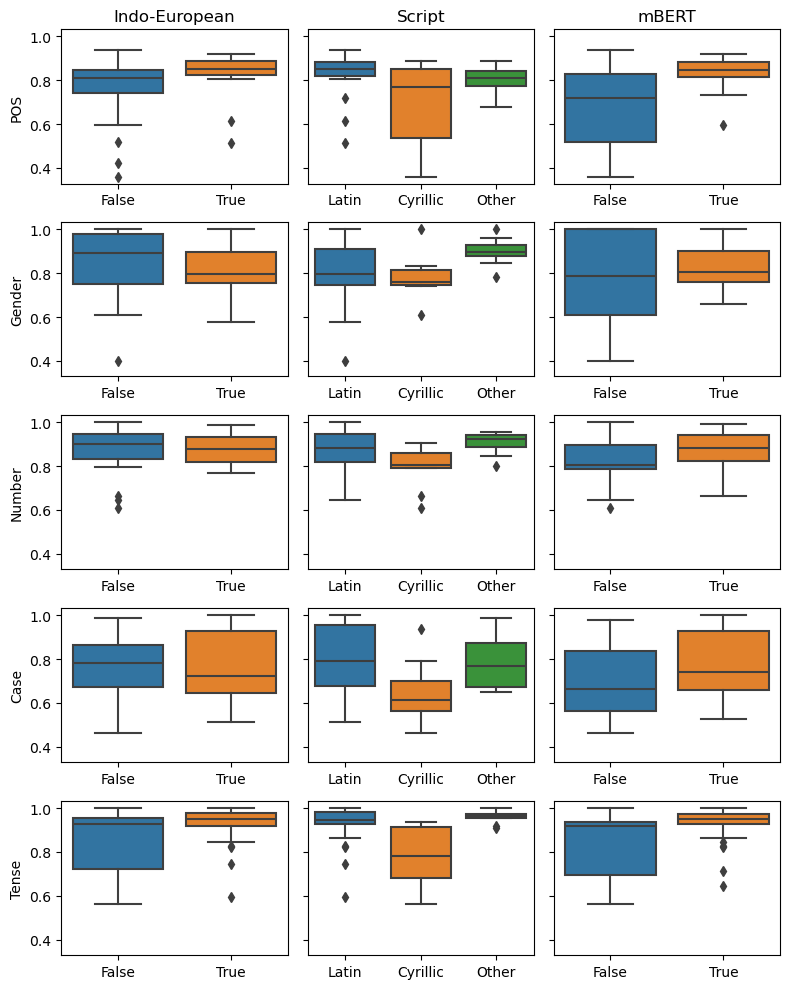

In [275]:
for idx, title in enumerate(x_titles):
    axes[0, idx].set_title(title)

for ax, row in zip(axes[:,0], y_labels):
    ax.set_ylabel(row)
fig.tight_layout()
fig

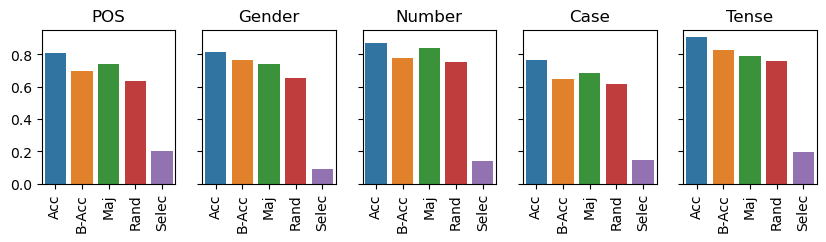

In [545]:
fig_bar

## Evenness Calculations

In [377]:
case_even = pd.read_csv("results/evenness_case.tsv", sep="\t", index_col=0)
upos_even = pd.read_csv("results/evenness_upos.tsv", sep="\t",  index_col=0)
gender_even = pd.read_csv("results/evenness_gender.tsv", sep="\t",  index_col=0)
tense_even = pd.read_csv("results/evenness_tense.tsv", sep="\t",  index_col=0)
number_even = pd.read_csv("results/evenness_number.tsv", sep="\t",  index_col=0)

In [419]:
all_evenness = {
    "Case": case_even,
    "Tense": tense_even,
    "Upos": upos_even, 
    "Gender": gender_even,
    "Number": number_even}


In [411]:
def apply_ie_col(row):
    lang = row["Language"]
    return lang_data[lang_data["language"] == lang]["family"].str.split(",").str[0].values[0]

In [414]:
def apply_script_col(row):
    lang = row["Language"]
    return lang_data[lang_data["language"] == lang]["script"].str.split(",").str[0].values[0]

In [420]:
for even in all_evenness.values():
    even["Language"] = even["Language"].str.split("_").str.join(" ")
    even["Family"] = even.apply(apply_ie_col, axis=1)
    even["Script"] = even.apply(apply_script_col, axis=1)
    apply_groups(even, langs=bert_langs)

In [426]:
for task, df in all_evenness.items():
    print(task)
    label_num = round(df["#Labels"].mean(), ndigits=1)
    even_index = round(df["Shannon Evenness Index"].mean(), ndigits=3)
    print(f"Shannon Evenness Index: {even_index}\t Avg. #Labels: {label_num}")
    print("==="*30)

Case
Shannon Evenness Index: 0.7	 Avg. #Labels: 6.6
Tense
Shannon Evenness Index: 0.773	 Avg. #Labels: 2.8
Upos
Shannon Evenness Index: 0.824	 Avg. #Labels: 16.0
Gender
Shannon Evenness Index: 0.819	 Avg. #Labels: 2.8
Number
Shannon Evenness Index: 0.679	 Avg. #Labels: 2.4


In [434]:
for task, df in all_evenness.items():
    print(task)
    grouped = df[["Indo-European", "Shannon Evenness Index", "#Labels"]].groupby(by="Indo-European")
    print(grouped.mean())
    print("===="*30)

Case
               Shannon Evenness Index   #Labels
Indo-European                                  
False                        0.647210  8.947368
True                         0.730631  5.281250
Tense
               Shannon Evenness Index   #Labels
Indo-European                                  
False                        0.816739  2.411765
True                         0.753075  2.921053
Upos
               Shannon Evenness Index    #Labels
Indo-European                                   
False                        0.806817  15.178571
True                         0.836631  16.564103
Gender
               Shannon Evenness Index   #Labels
Indo-European                                  
False                        0.687156  2.363636
True                         0.861036  2.942857
Number
               Shannon Evenness Index   #Labels
Indo-European                                  
False                        0.635083  2.300000
True                         0.702395  2.378378


In [435]:
for task, df in all_evenness.items():
    print(task)
    grouped = df[["Script", "Shannon Evenness Index", "#Labels"]].groupby(by="Script")
    print(grouped.mean())
    print("===="*30)

Case
          Shannon Evenness Index   #Labels
Script                                    
Cyrillic                0.685393  8.100000
Latin                   0.724533  6.500000
Other                   0.626465  5.555556
Tense
          Shannon Evenness Index   #Labels
Script                                    
Cyrillic                0.797679  2.600000
Latin                   0.759356  2.833333
Other                   0.798643  2.666667
Upos
          Shannon Evenness Index    #Labels
Script                                     
Cyrillic                0.816992  14.300000
Latin                   0.835836  16.452381
Other                   0.796294  15.800000
Gender
          Shannon Evenness Index   #Labels
Script                                    
Cyrillic                0.819164  2.571429
Latin                   0.830789  2.935484
Other                   0.775796  2.500000
Number
          Shannon Evenness Index   #Labels
Script                                    
Cyrillic           

In [436]:
for task, df in all_evenness.items():
    print(task)
    grouped = df[["In mBERT Training Data", "Shannon Evenness Index", "#Labels"]].groupby(by="In mBERT Training Data")
    print(grouped.mean())
    print("===="*30)

Case
                        Shannon Evenness Index   #Labels
In mBERT Training Data                                  
False                                 0.674386  6.900000
True                                  0.705691  6.585366
Tense
                        Shannon Evenness Index   #Labels
In mBERT Training Data                                  
False                                 0.799328  2.363636
True                                  0.766109  2.863636
Upos
                        Shannon Evenness Index    #Labels
In mBERT Training Data                                   
False                                 0.831979  14.769231
True                                  0.822292  16.277778
Gender
                        Shannon Evenness Index   #Labels
In mBERT Training Data                                  
False                                 0.697320  2.333333
True                                  0.849165  2.918919
Number
                        Shannon Evenness Index   #Labe